<a href="https://colab.research.google.com/github/Zahra2351373/Image-Processing-Final-Project/blob/Master/Experiment%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Importing Libraries
Firstly, necessary libraries including OpenCV for image processing tasks, and convolution layer and max pool for implementing contracting path must be imported. An input layer is needed for feeding images to the network. Also transposed and concatenation layers are critical for implementing expansive and connection paths respectively.PIL library is used for image processing tasks and NumPy is needed for computing purposes. Matplotlib is critical for sowing graphs and images and ImageDataGenerator of the Keras is needed for the data augmentation task.

In [1]:
import cv2
import glob
import os
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Cropping2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model
from PIL import Image
from PIL import ImageSequence
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD


#Defining Image size
Image size and channels must be defined and 1 relates to the grayscale image.

In [2]:
num_classes = 1
image_height=256
image_width=256
image_size=(256,256)

#Mounting Google Drive
This allows the colab to access folders located in google drive. Then I need to unzip our zip files including image data and image mask to use them in my deep neural network.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
os.chdir("/content/drive/MyDrive/")
os.listdir()

['tr_mask.nii.gz',
 'val_im.nii.gz',
 'Colab Notebooks',
 'test-volume',
 'train-labels',
 'train-volume',
 'Dataset',
 'test-volume.zip',
 'train-labels.zip',
 'train-volume.zip',
 'images',
 'tr_im.nii.gz',
 'blkwht.jpg',
 'Dataset.zip',
 'kaggle.json',
 'kaggle']

In [5]:
!unzip -uq "/content/drive/MyDrive/train-volume.zip" -d "/content/drive/MyDrive/Dataset"
!unzip -uq "/content/drive/MyDrive/train-labels.zip" -d "/content/drive/MyDrive/Dataset"
!unzip -uq "/content/drive/MyDrive/test-volume.zip" -d "/content/drive/MyDrive/Dataset"

In [6]:
labels = glob.glob('/content/drive/MyDrive/train-labels/*.jpg')
datas = glob.glob('/content/drive/MyDrive/train-volume/*.jpg')


In [7]:
labels

['/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-22.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-21.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-16.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-15.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-27.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-12.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-17.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-1.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-9.jpg',
 '/content/drive/MyDrive/train-labels/762ea16c413449c49ac2c2061987a9f6FPQDADvZRhCjXLMm-26.jpg',
 '/content/drive/MyDrive/train-labels/762e

In [8]:
datas

['/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-22.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-19.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-25.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-2.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-10.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-12.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-4.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-21.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-6.jpg',
 '/content/drive/MyDrive/train-volume/69f8ef7180b24fb2cd2cd352e035aa52bkiUFPPWFzrkvMy9-23.jpg',
 '/content/drive/MyDrive/train-volume/69f8e

#Data Preparation
I have to map image data to image labels for training my model. For this task, I have to read image by Image.open(images) and I want to make sure that the size of the image is 256x256 by resize(image_size), I have to do this for masks too. An array is created by image and labels using np.array() as I have to work with arrays, not images for training my deep neural network.

In [9]:
images = []
masks = []
for image, mask in zip(datas, labels):
    
    images.append(np.array(Image.open(image).resize(image_size)))
    masks.append(np.array(Image.open(mask).resize(image_size)))    
images = np.array(images)
masks = np.array(masks)
print(images.shape, masks.shape)

(30, 256, 256) (30, 256, 256)


As the number of channels is important for deep neural networks I reshaped my data using reshape(data_images.shape + (1,)). I should mention that I also could use NumPy.expand_dims instead of reshape(data_images.shape + (1,)) for my task.Then I divided my image and labels into 255(maximum number of pixels for an image= 2^8 - 1) to prevent huge computations in convolutions and loss information, that is why it is better that input numbers are normalized and their values are between 0 and 1.

In [10]:
images = images.reshape(images.shape + (1,))
masks = masks.reshape(masks.shape + (1,))

images = images/255.0
masks = masks/255.0


#Dividing Data
I used the scikit-learn library for train-test-split to use 30% of data for validation as my dataset does not have validation images and I have to use a part of my data for validation, and 70% of my data for training my model. The random state is a parameter that is initialized to 42 in most of the deep neural networks but I chose it 0 and did not change it as I do not want to initialize random to be impactful on choosing parameters and hyperparameters of my model in each training process.

In [11]:
train_data, val_data, train_label, val_label = train_test_split(
    images, masks,test_size=0.3, random_state=0)

print("train_data: ", train_data.shape)
print("train_label: ", train_label.shape)
print("val_data: ", val_data.shape)
print("val_label: ", val_label.shape)

train_data:  (21, 256, 256, 1)
train_label:  (21, 256, 256, 1)
val_data:  (9, 256, 256, 1)
val_label:  (9, 256, 256, 1)



#Data Augmentation
Data augmentation is the cheapest way to train more data for my deep neural network model. I defined appropriate parameters for data augmentation task with random seed=42, as I mentioned before it is important that random seed be constant. Keras does data augmentation using ImageDataGenerator with by default parameters and I can change these parameters in the next code block. I should mention that generally validation data is not augmented and I did not augment my validation data but I had to define in my function to avoid errors.

In [12]:
def data_augmentation(train_data, trian_label, val_data= None, val_label= None, batch_size=32,
                 seed=42, datagen_args= dict(rotation_range=15., width_shift_range=0.05,
                                            height_shift_range=0.05, shear_range=0.09,
                                            zoom_range=0.02, horizontal_flip=True, 
                                            vertical_flip=True, fill_mode='constant')):
    
    train_data_datagen = ImageDataGenerator(**datagen_args)
    train_label_datagen = ImageDataGenerator(**datagen_args)
    
    train_data_datagen.fit(train_data, augment=True, seed=seed)
    train_label_datagen.fit(train_label, augment=True, seed=seed)
    
    train_data_augmented = train_data_datagen.flow(train_data, batch_size=batch_size,
                                                  shuffle=True, seed=seed)
    train_label_augmented = train_label_datagen.flow(train_label, batch_size=batch_size,
                                                    shuffle=True, seed=seed)
    
    train_generator = zip(train_data_augmented, train_label_augmented)
    
    if (val_data!= None) and (val_label!= None):
        valid_data_datagen = ImageDataGenerator(**datagen_args)
        valid_label_datagen = ImageDataGenerator(**datagen_args)

        valid_data_datagen.fit(valid_data, augment=True, seed=seed)
        valid_label_datagen.fit(valid_label, augment=True, seed=seed)

        valid_data_augmented = valid_data_datagen.flow(valid_data, batch_size=batch_size,
                                                      shuffle=True, seed=seed)
        valid_label_augmented = valid_label_datagen.flow(valid_label, batch_size=batch_size,
                                                        shuffle=True, seed=seed)
        
        valid_generator = zip(valid_data_augmented, valid_label_augmented)
        
        return train_generator, valid_generator
    
    else:
        return train_generator

In [13]:
train_gen = data_augmentation(
    train_data, train_label, batch_size=2,
    datagen_args= dict(
        rotation_range=15.,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=50,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant'
    ))

#Building Model
I defined my model using defining contracting path function which does convolution but I did not apply max-pooling in this part. I implemented each step using my defined function. The difference between my implementation and the original U-Net implementation is in the original paper the images are in the size of 572x572 but I resized to 256x256 to decrease computations.The activation function based on the original U-Net paper is relu but I used selu and as I do not want to apply padding that is why the padding is the same here. The U-Net is not a sequential model and it contains the skip connections path, that is why I have to use concatenation. Dropout layer is necessary to avoid overfitting and batch normalization is critical too to make sure that all values are in 0 to 1. As the U-Net has 4 stages of convolutions that is why the number of layers is 4 and the filter size starts with 16 and becomes twice. Then I had to use transpose convolution for the expansive path and I had to repeat it 4 times as U-Net has 4 stages of this.

In [14]:
def contract_conv(input_x, filters, act='selu', pad='same'):
    c = Conv2D(filters,(3,3),activation=act, padding=pad)(input_x)
    c = BatchNormalization()(c)
    c = Dropout(0.3)(c)
    c = Conv2D(filters,(3,3),activation='selu', padding=pad)(c)
    c = BatchNormalization()(c)
    return c

In [15]:
filters, num_layers= 16, 4
input_layer = Input((256, 256, 1))

In [16]:
unet_layers = input_layer
conv_layers = []
for l in range(num_layers):
      unet_layers = contract_conv(unet_layers, filters=filters)
      print(unet_layers)
      conv_layers.append(unet_layers)
      unet_layers = MaxPool2D((2,2))(unet_layers)
      filters *= 2

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 16), dtype=tf.float32, name=None), name='batch_normalization_1/FusedBatchNormV3:0', description="created by layer 'batch_normalization_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 32), dtype=tf.float32, name=None), name='batch_normalization_3/FusedBatchNormV3:0', description="created by layer 'batch_normalization_3'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='batch_normalization_5/FusedBatchNormV3:0', description="created by layer 'batch_normalization_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 128), dtype=tf.float32, name=None), name='batch_normalization_7/FusedBatchNormV3:0', description="created by layer 'batch_normalization_7'")


In [17]:
unet_layers = contract_conv(input_x=unet_layers, filters=filters,pad='same')
print(unet_layers)

KerasTensor(type_spec=TensorSpec(shape=(None, 16, 16, 256), dtype=tf.float32, name=None), name='batch_normalization_9/FusedBatchNormV3:0', description="created by layer 'batch_normalization_9'")


In [18]:
for conv in reversed(conv_layers):
  filters //= 2
  unet_layers = Conv2DTranspose(filters,(2, 2),strides=(2, 2), padding='same')(unet_layers)
  print("====================")
  print(unet_layers)
  print("====================")
  print(conv)
  print("====================")
  unet_layers = concatenate([unet_layers,conv])
  unet_layers = contract_conv(unet_layers, filters)
output_layer = Conv2D(num_classes, (1,1), activation='sigmoid')(unet_layers)

KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 128), dtype=tf.float32, name=None), name='conv2d_transpose/BiasAdd:0', description="created by layer 'conv2d_transpose'")
KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 128), dtype=tf.float32, name=None), name='batch_normalization_7/FusedBatchNormV3:0', description="created by layer 'batch_normalization_7'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='conv2d_transpose_1/BiasAdd:0', description="created by layer 'conv2d_transpose_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 64), dtype=tf.float32, name=None), name='batch_normalization_5/FusedBatchNormV3:0', description="created by layer 'batch_normalization_5'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 32), dtype=tf.float32, name=None), name='conv2d_transpose_2/BiasAdd:0', description="created by layer 'conv2d_transpose_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 32), dtype=tf.float

In [19]:
u_net= Model(inputs=input_layer, outputs=output_layer)
u_net.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

#Metrics
I used jacard and dice_coef

In [20]:

smooth = 1
def jacard(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum ( y_true_f * y_pred_f)
    union = K.sum ( y_true_f + y_pred_f - y_true_f * y_pred_f)
    return intersection/union


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


#Compiling Model
I compiled my model using SGD optimizer with the highest momentum and learning rate of 0.01 and binary-crossentropy loss function.

In [21]:
u_net.compile(
    optimizer=SGD(lr=0.01,momentum=0.99),
    loss='binary_crossentropy',
    metrics=[jacard, dice_coef]
)

In [22]:
hist = u_net.fit_generator(train_gen, steps_per_epoch=100,\
                epochs=20, validation_data=(val_data, val_label))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 41s 54ms/step - loss: 0.6108 - jacard: 0.5639 - dice_coef: 0.7174 - val_loss: 0.6104 - val_jacard: 0.7187 - val_dice_coef: 0.8363
Epoch 2/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4669 - jacard: 0.6515 - dice_coef: 0.7883 - val_loss: 0.5344 - val_jacard: 0.6381 - val_dice_coef: 0.7791
Epoch 3/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4736 - jacard: 0.6350 - dice_coef: 0.7762 - val_loss: 0.5374 - val_jacard: 0.6183 - val_dice_coef: 0.7642
Epoch 4/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4628 - jacard: 0.6331 - dice_coef: 0.7746 - val_loss: 0.5439 - val_jacard: 0.6653 - val_dice_coef: 0.7990
Epoch 5/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4697 - jacard: 0.6291 - dice_coef: 0.7719 - val_loss: 0.5357 - val_jacard: 0.6510 - val_dice_coef: 0.7886
Epoch 6/20
100/100 [==============================] - 3s 28ms/step - loss: 0.4601 - 

#Results
I used matplotlib for showing my results.

In [23]:
res = u_net.predict(train_data[3].reshape(1, 256, 256,1))
res = (res >0.75)

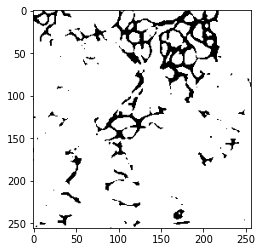

In [24]:
plt.imshow(np.reshape(res[0]*255, image_size), cmap='gray')


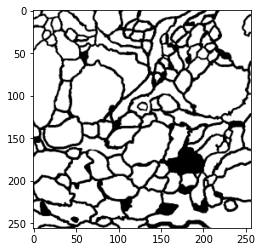

In [25]:
plt.imshow(np.reshape(train_label[0]*255, image_size), cmap='gray')

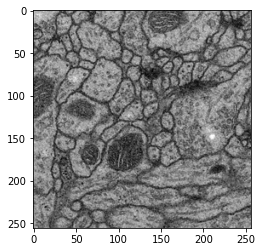

In [26]:
plt.imshow(np.reshape(train_data[0]*255, image_size), cmap='gray')